In [5]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#cambiar el directorio de trabajo actual
os.chdir('/content/drive/MyDrive/datos')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
#lectura de datos por categoria
dataset=pd.read_csv("WineQT.csv")
dataset.head(1150)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [8]:
columnas_relevantes = dataset.drop(columns=['Id'])
# Función para calcular percentil sin librerías
def calcular_percentil(columna, percentil):
    sorted_column = sorted(columna)
    k = (len(sorted_column) - 1) * (percentil / 100)
    f = int(k)
    c = k - f
    return sorted_column[f] + (c * (sorted_column[f + 1] - sorted_column[f]))

# Calcular percentiles (ejemplo: 25, 50 y 75)
for column in columnas_relevantes.columns:
    if dataset[column].dtype in ['int64', 'float64']:  # Solo para columnas numéricas
        print(f'Percentil 25 de {column}:', calcular_percentil(dataset[column], 25))
        print(f'Percentil 50 (Mediana) de {column}:', calcular_percentil(dataset[column], 50))
        print(f'Percentil 75 de {column}:', calcular_percentil(dataset[column], 75))
        print("\n")

# Función para calcular cuartiles
def calcular_cuartiles(columna):
    q1 = calcular_percentil(columna, 25)
    q2 = calcular_percentil(columna, 50)  # Mediana
    q3 = calcular_percentil(columna, 75)
    return q1, q2, q3

# Mostrar cuartiles
for column in columnas_relevantes.columns:
    if dataset[column].dtype in ['int64', 'float64']:
        q1, q2, q3 = calcular_cuartiles(dataset[column])
        print(f'Cuartiles de {column}: Q1={q1}, Q2={q2}, Q3={q3}')
        print("\n")

Percentil 25 de fixed acidity: 7.1
Percentil 50 (Mediana) de fixed acidity: 7.9
Percentil 75 de fixed acidity: 9.1


Percentil 25 de volatile acidity: 0.3925
Percentil 50 (Mediana) de volatile acidity: 0.52
Percentil 75 de volatile acidity: 0.64


Percentil 25 de citric acid: 0.09
Percentil 50 (Mediana) de citric acid: 0.25
Percentil 75 de citric acid: 0.42


Percentil 25 de residual sugar: 1.9
Percentil 50 (Mediana) de residual sugar: 2.2
Percentil 75 de residual sugar: 2.6


Percentil 25 de chlorides: 0.07
Percentil 50 (Mediana) de chlorides: 0.079
Percentil 75 de chlorides: 0.09


Percentil 25 de free sulfur dioxide: 7.0
Percentil 50 (Mediana) de free sulfur dioxide: 13.0
Percentil 75 de free sulfur dioxide: 21.0


Percentil 25 de total sulfur dioxide: 21.0
Percentil 50 (Mediana) de total sulfur dioxide: 37.0
Percentil 75 de total sulfur dioxide: 61.0


Percentil 25 de density: 0.99557
Percentil 50 (Mediana) de density: 0.99668
Percentil 75 de density: 0.997845


Percentil 25 de pH:

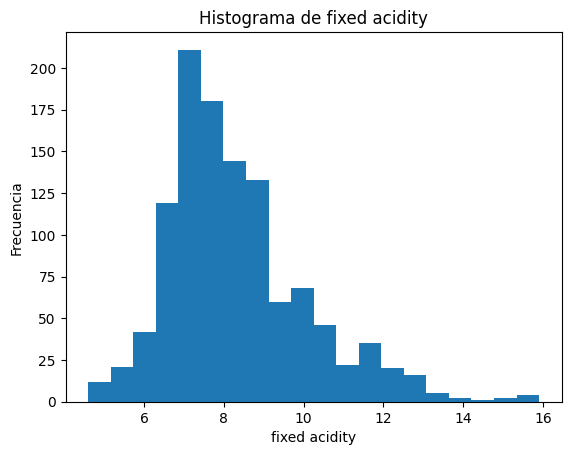

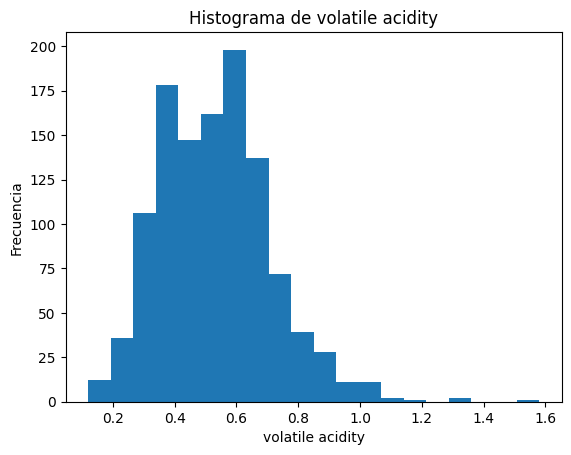

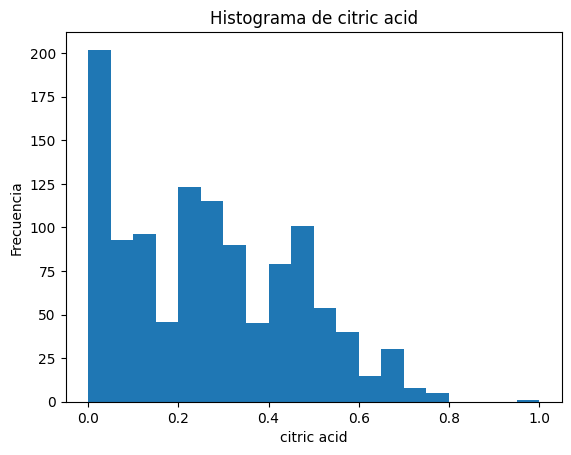

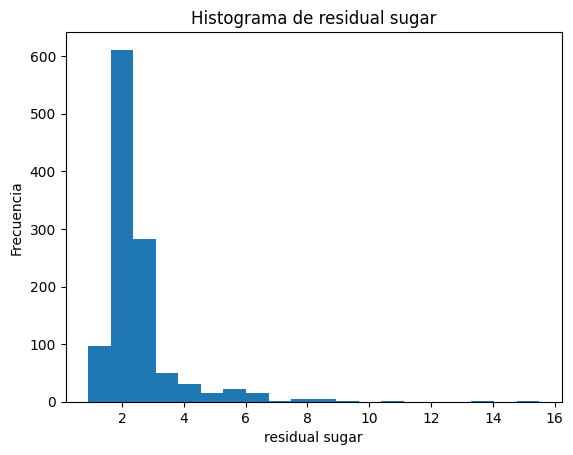

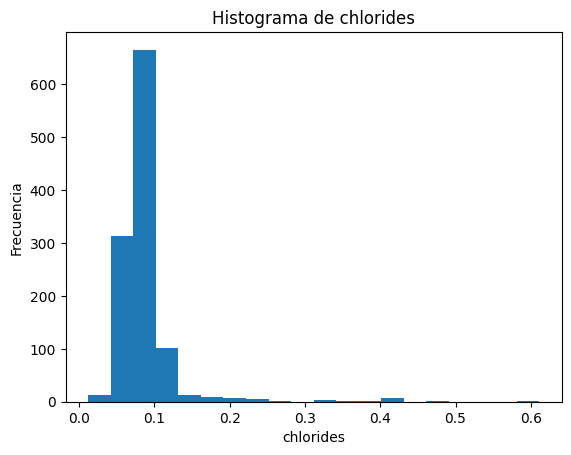

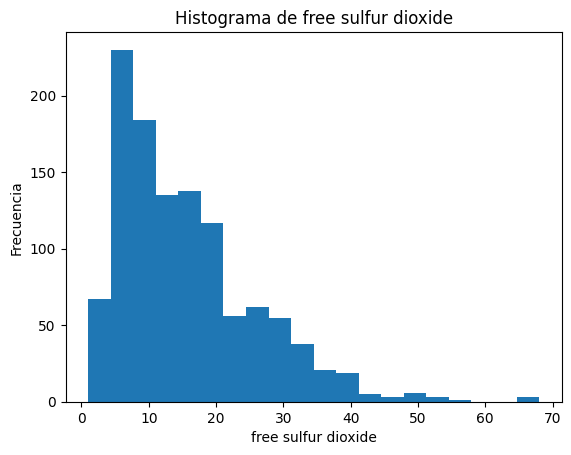

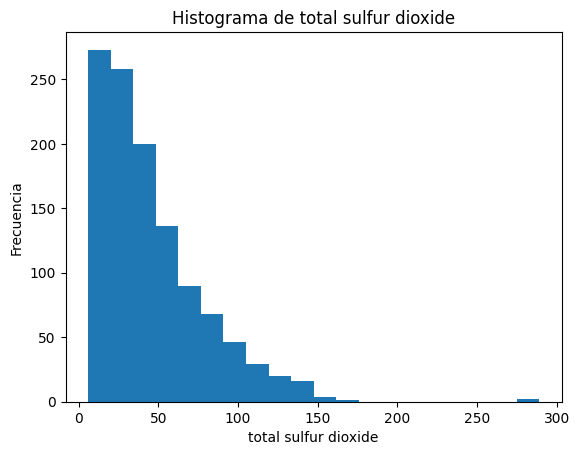

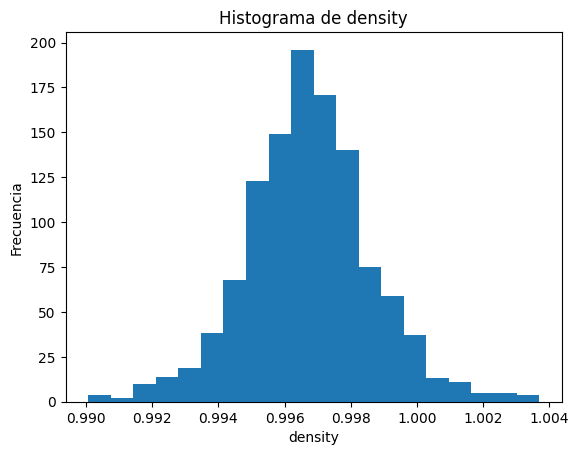

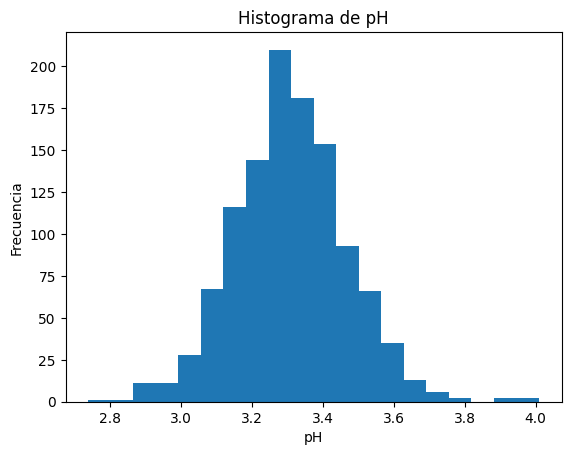

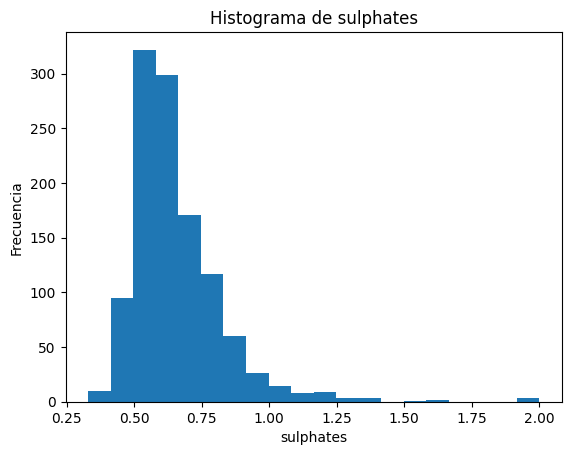

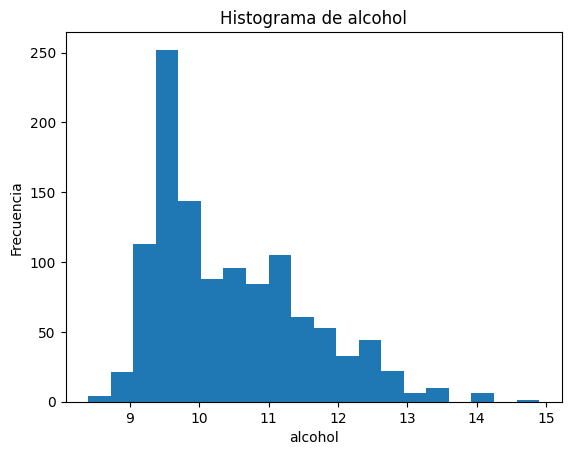

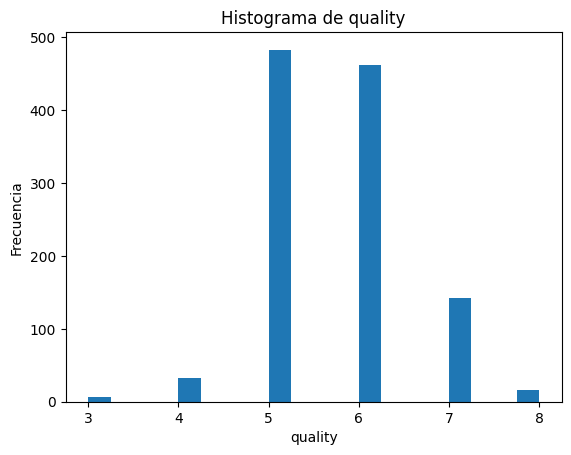

In [ ]:
import matplotlib.pyplot as plt

#Graficamos
for column in columnas_relevantes.columns:
    plt.figure()  # Crear una nueva figura para cada gráfico
    plt.hist(dataset[column].dropna(), bins=20)  # Creamos un histograma
    plt.xlabel(column)  # Ponemos la etiqueta del eje x
    plt.ylabel("Frecuencia")  # Ponemos la etiqueta del eje y
    plt.title(f"Histograma de {column}")  # Aca pondemos el título del gráfico

# Mostramos los gráficos
plt.show()